<a href="https://colab.research.google.com/github/medinadiegoeverardo/DS-Unit-1-Sprint-3-Statistical-Tests-and-Experiments/blob/master/module2-sampling-confidence-intervals-and-hypothesis-testing/medinadiego_LS_DS_132_Sampling_Confidence_Intervals_and_Hypothesis_Testing_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Assignment - Build a confidence interval

A confidence interval refers to a neighborhood around some point estimate, the size of which is determined by the desired p-value. For instance, we might say that 52% of Americans prefer tacos to burritos, with a 95% confidence interval of +/- 5%.

52% (0.52) is the point estimate, and +/- 5% (the interval $[0.47, 0.57]$) is the confidence interval. "95% confidence" means a p-value $\leq 1 - 0.95 = 0.05$.

In this case, the confidence interval includes $0.5$ - which is the natural null hypothesis (that half of Americans prefer tacos and half burritos, thus there is no clear favorite). So in this case, we could use the confidence interval to report that we've failed to reject the null hypothesis.

But providing the full analysis with a confidence interval, including a graphical representation of it, can be a helpful and powerful way to tell your story. Done well, it is also more intuitive to a layperson than simply saying "fail to reject the null hypothesis" - it shows that in fact the data does *not* give a single clear result (the point estimate) but a whole range of possibilities.

How is a confidence interval built, and how should it be interpreted? It does *not* mean that 95% of the data lies in that interval - instead, the frequentist interpretation is "if we were to repeat this experiment 100 times, we would expect the average result to lie in this interval ~95 times."

For a 95% confidence interval and a normal(-ish) distribution, you can simply remember that +/-2 standard deviations contains 95% of the probability mass, and so the 95% confidence interval based on a given sample is centered at the mean (point estimate) and has a range of +/- 2 (or technically 1.96) standard deviations.

Different distributions/assumptions (90% confidence, 99% confidence) will require different math, but the overall process and interpretation (with a frequentist approach) will be the same.

Your assignment - using the data from the prior module ([congressional voting records](https://archive.ics.uci.edu/ml/datasets/Congressional+Voting+Records)):


### Confidence Intervals:
1. Generate and numerically represent a confidence interval
2. Graphically (with a plot) represent the confidence interval
3. Interpret the confidence interval - what does it tell you about the data and its distribution?

### Chi-squared tests:
4. Take a dataset that we have used in the past in class that has **categorical** variables. Pick two of those categorical variables and run a chi-squared tests on that data
  - By hand using Numpy
  - In a single line using Scipy


In [0]:
import pandas as pd

In [0]:
df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/voting-records/house-votes-84.data', header=None,
                 names=['party','handicapped-infants','water-project',
                          'budget','physician-fee-freeze', 'el-salvador-aid',
                          'religious-groups','anti-satellite-ban',
                          'aid-to-contras','mx-missile','immigration',
                          'synfuels', 'education', 'right-to-sue','crime','duty-free',
                          'south-africa'])

In [3]:
df.head()

,party,handicapped-infants,water-project,budget,physician-fee-freeze,el-salvador-aid,religious-groups,anti-satellite-ban,aid-to-contras,mx-missile,immigration,synfuels,education,right-to-sue,crime,duty-free,south-africa
0,republican,n,y,n,y,y,y,n,n,n,y,?,y,y,y,n,y
1,republican,n,y,n,y,y,y,n,n,n,n,n,y,y,y,n,?
2,democrat,?,y,y,?,y,y,n,n,n,n,y,n,y,y,n,n
3,democrat,n,y,y,n,?,y,n,n,n,n,y,n,y,n,n,y
4,democrat,y,y,y,n,y,y,n,n,n,n,y,?,y,y,y,y


In [0]:
df = df.replace({'?': pd.np.nan, 'n': 0, 'y': 1})

In [0]:
df = df.fillna(method='ffill')

In [6]:
df.head(10)

,party,handicapped-infants,water-project,budget,physician-fee-freeze,el-salvador-aid,religious-groups,anti-satellite-ban,aid-to-contras,mx-missile,immigration,synfuels,education,right-to-sue,crime,duty-free,south-africa
0,republican,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,NaN,1.0,1.0,1.0,0.0,1.0
1,republican,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0
2,democrat,0.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0
3,democrat,0.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
4,democrat,1.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0
5,democrat,0.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0
6,democrat,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0
7,republican,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0
8,republican,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0
9,democrat,1.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [0]:
dem = df[df['party'] == 'democrat']
rep = df[df['party'] == 'republican']

In [8]:
rep['education'].shape

(168,)

In [9]:
rep['education'].head(10)

0     1.0
1     1.0
7     0.0
8     1.0
10    0.0
11    0.0
14    1.0
15    1.0
18    0.0
28    1.0
Name: education, dtype: float64

In [0]:
import numpy as np
import scipy.stats as stats

In [0]:
def confidence_interval(data, confidence=0.95):
  data = np.array(data)
  mean = np.mean(data)
  size = len(data)
  standard = np.std(data, ddof=1) / np.sqrt(size)
  margin_error = standard * stats.t.ppf((1 + confidence) / 2.0, size - 1) # ddof
  return mean, mean - margin_error, mean + margin_error

In [0]:
reps_edu = rep['education']

In [13]:
np.array(reps_edu)

array([1., 1., 0., 1., 0., 0., 1., 1., 0., 1., 1., 1., 1., 1., 0., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 0., 1., 1., 1., 1.,
       1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 0., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 0., 1., 0., 0., 0., 1., 1., 1., 1., 1., 1., 0.,
       1., 0., 1., 0., 1., 1., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1.,
       1., 0., 1., 1., 1., 0., 0., 0., 1., 0., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 0., 0., 1., 1., 1., 1., 1.])

**Null Hypothesis**
- Republicans' vote for the education policy, historically, has been around 65%

- Alternative: There has been a change in view for education in the Republicans' side 

**1**

In [14]:
mean_rep = confidence_interval(reps_edu)[0]
lower_bound = confidence_interval(reps_edu)[1]
upper_bound = confidence_interval(reps_edu)[2]
print(confidence_interval(reps_edu))

(0.8273809523809523, 0.769645092466795, 0.8851168122951096)


In [15]:
# Calculating confidence interval and t-statistic

# Sample Size
n = len(rep['education'])
# Degrees of Freedom
dof = n-1
# The Mean of Means:
mean = np.mean(rep['education'])
# Sample Standard Deviation
sample_std = np.std(rep['education'], ddof=1)
# Standard Error
std_err = sample_std/n**.5

CI = t.interval(.95, dof, loc=mean, scale=std_err)
print("95% Confidence Interval: ", CI)

NameError: ignored

In [0]:
ttest_1samp(rep['education'], .65, nan_policy='omit')
# t-statistic is 6.065

**2**

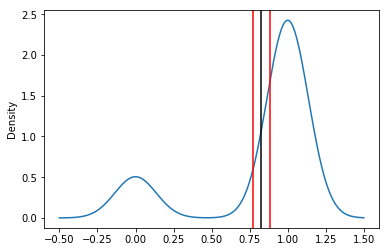

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt

#coinflips_42 = np.random.binomial(n=1, p=.5, size=42)
#sns.kdeplot(reps_edu)
reps_edu.plot(kind='density') 
CI = confidence_interval(reps_edu)
plt.axvline(x=CI[1], color='red')
plt.axvline(x=CI[2], color='red')
plt.axvline(x=CI[0], color='k');

**3**
- The mean is .82, confidence interval is around 6.06, making the lower and upper bounds .76 and .88, respectively.
The low t-statistic tells us that the distribution is skewed more so to the right, which means that the republicans
did indeed vote for the education policy and the probability that this outcome is random, that they should've voted
65% is too low (p-value: 0.000000008), so we must reject it.

# Chi-Squared

In [19]:
df = pd.read_csv('https://raw.githubusercontent.com/ryanleeallred/datasets/master/adult.csv', na_values=" ?")
print(df.shape)
df.head()

(32561, 15)


,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,country,salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [0]:
# Take a dataset that we have used in the past in class that 
# has **categorical** variables. Pick two of those categorical
# variables and run a chi-squared tests on that data
#   - By hand using Numpy
#   - In a single line using Scipy

**Null hypothesis:**
- Sex and marital status are independent of each other
**Alternative hypothesis:
They are more dependent of each other than we think.

In [20]:
df.describe(exclude='number')

,workclass,education,marital-status,occupation,relationship,race,sex,country,salary
count,30725,32561,32561,30718,32561,32561,32561,31978,32561
unique,8,16,7,14,6,5,2,41,2
top,Private,HS-grad,Married-civ-spouse,Prof-specialty,Husband,White,Male,United-States,<=50K
freq,22696,10501,14976,4140,13193,27816,21790,29170,24720


In [21]:
df['marital-status'].value_counts()

 Married-civ-spouse       14976
 Never-married            10683
 Divorced                  4443
 Separated                 1025
 Widowed                    993
 Married-spouse-absent      418
 Married-AF-spouse           23
Name: marital-status, dtype: int64

In [0]:
df['sex'].value_counts()

In [22]:
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,country,salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [23]:
df.nunique()

age                  73
workclass             8
fnlwgt            21648
education            16
education-num        16
marital-status        7
occupation           14
relationship          6
race                  5
sex                   2
capital-gain        119
capital-loss         92
hours-per-week       94
country              41
salary                2
dtype: int64

In [0]:
# (df['marital-status'] == 'Married-AF-spouse').value_counts()
df.dtypes

In [24]:
marital_sex = pd.crosstab(df['sex'], df['marital-status'], margins=True, margins_name='Total')
marital_sex

marital-status,Divorced,Married-AF-spouse,Married-civ-spouse,Married-spouse-absent,Never-married,Separated,Widowed,Total
sex,,,,,,,,
Female,2672,14,1657,205,4767,631,825,10771
Male,1771,9,13319,213,5916,394,168,21790
Total,4443,23,14976,418,10683,1025,993,32561


In [44]:
marital_female = marital_sex.iloc[1][0:7].values
marital_sex.iloc[0][0:7].values

array([2672,   14, 1657,  205, 4767,  631,  825])

In [43]:
marital_male = marital_sex.iloc[1][0:7].values
marital_sex.iloc[1][0:7].values

array([ 1771,     9, 13319,   213,  5916,   394,   168])

In [100]:
entire_table = marital_sex.iloc[0:3].values
marital_sex.iloc[0:3].values

array([[ 2672,    14,  1657,   205,  4767,   631,   825, 10771],
       [ 1771,     9, 13319,   213,  5916,   394,   168, 21790],
       [ 4443,    23, 14976,   418, 10683,  1025,   993, 32561]])

In [28]:
marital_sex.loc['Total','Total']

32561

In [0]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

#categories = ['Divorced',	'Married-AF-spouse', 'Married-civ-spouse', 'Married-spouse-absent', 'Never-married', 'Separated', 'Widowed']

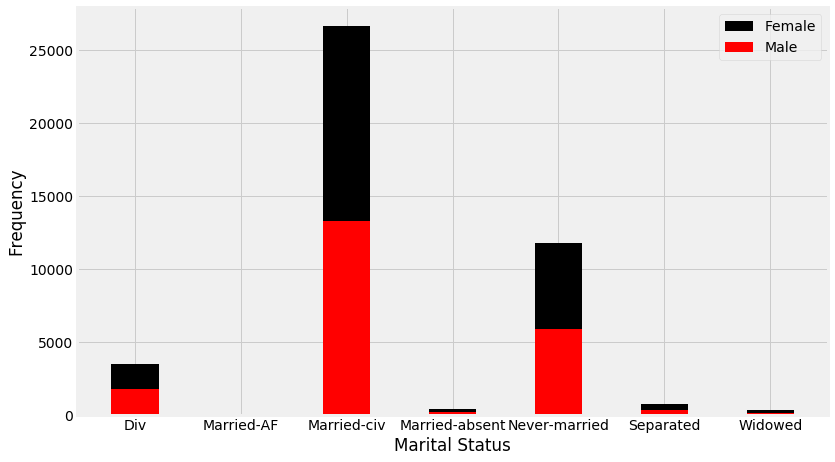

In [66]:
fig, ax = plt.subplots(figsize=(12,7), facecolor='white')
x= np.arange(len(categories)) #np.arange(0,(16*8),2)
width = .45

plt.style.use('fivethirtyeight')

plt1= plt.bar(categories, marital_male, width, color='red', align='center') # label='')
plt2 = plt.bar(categories, marital_female, width, color='black', bottom=marital_male)

plt.legend((plt2[0], plt1[0]), ('Female', 'Male'))
plt.xlabel('Marital Status')
plt.ylabel('Frequency')
plt.show()

#ax.get_xticklabels()
plt.show()

In [0]:
# def plot_data(x_array, z_array, labels):
  
#   #categories_lst = labels
#   x = np.arange(len(labels))
#   width = .35

#   fig, ax = plt.subplots() # importing features from fig and ax
#   plt.style.use('fivethirtyeight')
#   ax1 = ax.bar(labels, x_array, width, ax=ax)
#   ax2 = ax.bar(labels, z_array, width, ax=ax)
#   ax.set_title("Iran and Bhutan")

#   ax.set_title('Marital Status and Sex')
#   ax.set_xticks(x)
#   ax.legend()
#   label = ax.get_xticklabels()

#   plt.setp(label, rotation=45, horizontalalignment='right')
#   fig.tight_layout()
#   plt.show();

#   return

# plot_data(marital_men, marital_men, categories)

In [68]:
marital_sex

marital-status,Divorced,Married-AF-spouse,Married-civ-spouse,Married-spouse-absent,Never-married,Separated,Widowed,Total
sex,,,,,,,,
Female,2672,14,1657,205,4767,631,825,10771
Male,1771,9,13319,213,5916,394,168,21790
Total,4443,23,14976,418,10683,1025,993,32561


In [104]:
entire_table

array([[ 2672,    14,  1657,   205,  4767,   631,   825, 10771],
       [ 1771,     9, 13319,   213,  5916,   394,   168, 21790],
       [ 4443,    23, 14976,   418, 10683,  1025,   993, 32561]])

In [105]:
# totals
rowsum = marital_sex.iloc[0:2, 7].values
rowsum

array([10771, 21790])

In [106]:
colsum = marital_sex.iloc[2, 0:7].values
colsum

array([ 4443,    23, 14976,   418, 10683,  1025,   993])

In [0]:
sum_of = marital_sex.loc['Total', 'Total']

In [108]:
expected = []
for i in range(len(rowsum)):
  expected_row = []
  for column in colsum:
    expected_val = column*rowsum[i]/sum_of
    expected_row.append(expected_val)
  expected.append(expected_row)
  

expected = np.array(expected)
print(expected.shape)  
print(expected)

(2, 7)
[[1.46972000e+03 7.60827370e+00 4.95397856e+03 1.38272105e+02
  3.53387774e+03 3.39064371e+02 3.28478947e+02]
 [2.97328000e+03 1.53917263e+01 1.00220214e+04 2.79727895e+02
  7.14912226e+03 6.85935629e+02 6.64521053e+02]]


In [109]:
observed = pd.crosstab(df['sex'], df['marital-status']).values
observed

array([[ 2672,    14,  1657,   205,  4767,   631,   825],
       [ 1771,     9, 13319,   213,  5916,   394,   168]])

In [110]:
chi_squared = ((observed - expected)**2/(expected)).sum() 
print(f"Chi-Squared: {chi_squared}")

Chi-Squared: 6944.747255715985


In [112]:
dof = (len(rowsum)-1)*(len(colsum)-1)
print(f"Degrees of Freedom: {dof}") 

Degrees of Freedom: 6


In [113]:
chi_squared, p_value, dof, expected = stats.chi2_contingency(observed)

print(f"Chi-Squared: {chi_squared}")
print(f"P-value: {p_value}")
print(f"Degrees of Freedom: {dof}") 
print("Expected: \n", np.array(expected))

Chi-Squared: 6944.747255715985
P-value: 0.0
Degrees of Freedom: 6
Expected: 
 [[1.46972000e+03 7.60827370e+00 4.95397856e+03 1.38272105e+02
  3.53387774e+03 3.39064371e+02 3.28478947e+02]
 [2.97328000e+03 1.53917263e+01 1.00220214e+04 2.79727895e+02
  7.14912226e+03 6.85935629e+02 6.64521053e+02]]


- Null Hypothesis: Marital status is independent of sex.

- The p-value is too low, so we must reject the null hypothesis that marital status and sex are independent of each other. The alternative hypothesis suggests that they are more dependent of each other than we think.

## Stretch goals:

1. Write a summary of your findings, mixing prose and math/code/results. *Note* - yes, this is by definition a political topic. It is challenging but important to keep your writing voice *neutral* and stick to the facts of the data. Data science often involves considering controversial issues, so it's important to be sensitive about them (especially if you want to publish).
2. Apply the techniques you learned today to your project data or other data of your choice, and write/discuss your findings here.
3. Refactor your code so it is elegant, readable, and can be easily run for all issues.

## Resources

- [Interactive visualize the Chi-Squared test](https://homepage.divms.uiowa.edu/~mbognar/applets/chisq.html)
- [Calculation of Chi-Squared test statistic](https://en.wikipedia.org/wiki/Pearson%27s_chi-squared_test)
- [Visualization of a confidence interval generated by R code](https://commons.wikimedia.org/wiki/File:Confidence-interval.svg)
- [Expected value of a squared standard normal](https://math.stackexchange.com/questions/264061/expected-value-calculation-for-squared-normal-distribution) (it's 1 - which is why the expected value of a Chi-Squared with $n$ degrees of freedom is $n$, as it's the sum of $n$ squared standard normals)